In [52]:
# Predicting Iris species using Logistic Regression

# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# Import dataset

dataset = pd.read_csv('/home/winsid96/Desktop/ML Projects/Done/iris.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [54]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [55]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
# Applying LDA (Linear Discriminant Analysis)
# LDA is a dimensionality reduction technique which seeks to find a linear combination
# of features that characterizes or separates two or more classes of objects

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [57]:
# Fitting classifier to the Training set
# Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)

In [59]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [60]:
# Calculating model accuracy using confusion matrix 

accuracy = 100*sum(cm[i][i] for i in range(len(cm))) / sum(sum(c for c in cm[i]) for i in range(len(cm)))
print("Accuracy = {:.3f} %".format(accuracy))

Accuracy = 86.842 %


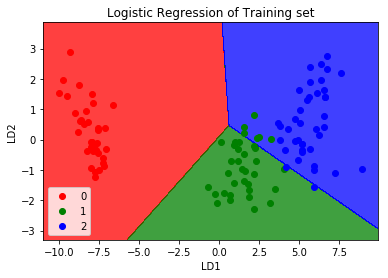

In [61]:
# Visualising Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                                        alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression of Training set')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

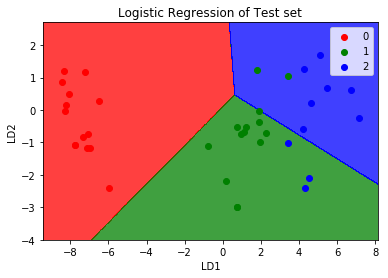

In [62]:
# Visualising Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                                        alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression of Test set')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()